In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
import seaborn as sns
import glob 
import pandas as pd
sns.set(style="dark")


In [138]:
def process_data(env_path, N=20):
    data = []
    mode_insert_data = []
    min_size = np.inf
    for path in glob.glob(env_path + 'seed*/'):
        try: 
            data_set = pickle.load(open(path + 'reward_data.pkl', 'rb'))

            data_set = np.stack(data_set)
            if data_set[-1,0] < min_size:
                min_size = data_set[-1,0]
            data.append(data_set)
        except:
            pass
    x_samples = np.linspace(0, min_size, N)
    interp_data = []
    for data_set in data:
        _x = data_set[:,0]
        _y = data_set[:,1] 

        interp_data.append(np.interp(x_samples, _x, _y))
        
    mean = np.mean(interp_data, axis=0)
    std  = np.std(interp_data, axis=0)
    data_log = {'x' : x_samples, 'mean' : mean, 'std' : std, 
                'max' : np.max(interp_data, axis=0),
               'min' : np.min(interp_data, axis=0),
               '-std' : mean-std,
               '+std' : mean+std, 'data' : interp_data}

    return data_log

def plot_data(ax, log, color, label):
#     print(len(log['data']))
    ax.plot(log['x'], log['mean'],color=color, label=label)
#     ax.fill_between(log['x'], 
#                     log['min'], log['max'],
#                     color=color,
#                     alpha=0.2)
    ax.fill_between(log['x'], 
                    log['-std'], log['+std'], 
                    color=color,
                    alpha=0.2)
    
def get_log(raw_data,hybrid_data,interp=False,N=11):
    if not interp: 
        N = len(raw_data[0][:,0])+1
    x_samples = np.linspace(0, raw_data[0][-1,0], N)
    data = np.empty([0,N])        
    for idx,d in enumerate(raw_data): 
        _x = np.hstack([hybrid_data['x'][0],d[:,0]])    
        _y = np.hstack([hybrid_data['data'][idx][0],d[:,1]]) 
        if interp:
            interp_data = np.array([np.interp(x_samples,_x,_y)])
            data = np.vstack([data,interp_data])
        else: 
            data = np.vstack([data,_y])

    mean = np.mean(data, axis=0)
    std  = np.std(data,axis=0)
    data_log = {'x' : x_samples, 
                'mean' : mean, 
                'std' : std, 
                'max' : np.max(data, axis=0),
                'min' : np.min(data, axis=0),
                '-std' : mean-std,
                '+std' : mean+std, 
                'data' : data}

    return data_log


def get_log_normalized(raw_data,hybrid_data,interp=False,N=11):
    if not interp: 
        N = len(raw_data[0][:,0])+1
    x_samples = np.linspace(0, raw_data[0][-1,0], N)
    data = np.empty([0,N])        
    for idx,d in enumerate(raw_data): 
        _x = np.hstack([hybrid_data['x'][0],d[:,0]])    
        _y = np.hstack([hybrid_data['data'][idx][0],d[:,1]]) 
        if interp:
            interp_data = np.array([np.interp(x_samples,_x,_y)])
            data = np.vstack([data,interp_data])
        else: 
            data = np.vstack([data,_y])

    # min-max normalization
    orig_data = data
    data = (data - np.min(data))/(np.max(data)-np.min(data))
    
    mean = np.mean(data, axis=0)
    std  = np.std(data,axis=0)
    x_samples = np.linspace(0,1,N)
    data_log = {'x' : x_samples, 
                'mean' : mean, 
                'std' : std, 
                'max' : np.max(data, axis=0),
                'min' : np.min(data, axis=0),
                '-std' : mean-std,
                '+std' : mean+std, 
                'data' : orig_data}

    return data_log

AcrobotEnv
policy (10, 10, 2) model (10, 10, 2)
InvertedPendulumRoboschoolEnv
policy (10, 10, 2) model (10, 10, 2)
HopperEnv
policy (10, 10, 2) model (10, 10, 2)
HalfCheetahEnv
policy (10, 10, 2) model (10, 10, 2)
AcrobotEnv
policy (10, 10, 2) model (10, 10, 2)
InvertedPendulumRoboschoolEnv
policy (10, 10, 2) model (10, 10, 2)
HopperEnv
policy (10, 10, 2) model (10, 10, 2)
HalfCheetahEnv
policy (10, 10, 2) model (10, 10, 2)


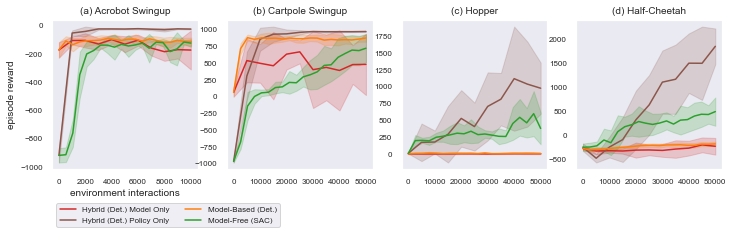

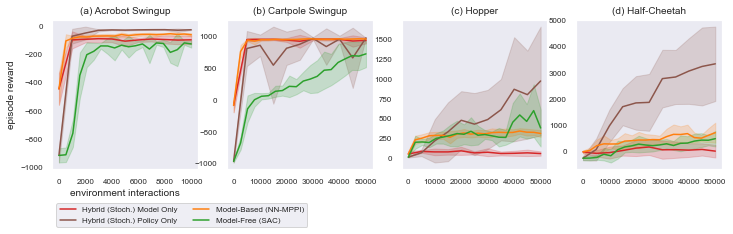

In [134]:
envs = ['AcrobotEnv','InvertedPendulumRoboschoolEnv','HopperEnv','HalfCheetahEnv']
plot_titles = ['(a) Acrobot Swingup','(b) Cartpole Swingup', '(c) Hopper', '(d) Half-Cheetah']

for det in [True, False]:
    fig, axs = plt.subplots(1, len(envs), figsize=(len(envs)*3,2.75))
    for i, env in enumerate(envs):
        got_data = False
        try: 
            model_data_path = '../data/mpc_{}/{}/'.format('deter' if det else 'stoch',env)
            model_based_data = process_data(model_data_path)

            policy_data_path = '../data/sac__/' + env +'/'
            model_free_data = process_data(policy_data_path)

            got_data = True                

            path_dir = '../data/hlt_deter/' if det else '../data/hlt_stoch/'         
            policy_data = pickle.load(open(path_dir+env+'/policy_test/reward_data.pkl', 'rb'))
            print(env)
            policy_data_set = get_log(policy_data,model_free_data)


            model_data = pickle.load(open(path_dir+env+'/model_test/reward_data.pkl', 'rb'))
            model_data_set = get_log(model_data,model_based_data)
            print('policy',np.array(policy_data).shape,
                  'model', np.array(model_data).shape)
        except: # placeholder
            policy_data_set['x'] = 0
            policy_data_set['mean'] = 0
            pass
            model_data_set['x'] = 0
            model_data_set['mean'] = 0
            pass
        if got_data: 
            ax = axs[i]
            plot_data(ax,model_data_set,color='tab:red',label='Hybrid {} Model Only'.format('(Det.)' if det else '(Stoch.)'))
            plot_data(ax,policy_data_set,color='tab:brown',label='Hybrid {} Policy Only'.format('(Det.)' if det else '(Stoch.)'))          
            plot_data(ax,model_based_data,color='tab:orange',label='Model-Based {}'.format('(Det.)' if det else '(NN-MPPI)'))
            plot_data(ax,model_free_data,color='tab:green',label='Model-Free (SAC)')
            axs[i].tick_params(axis='both', which='major', labelsize=8)
            axs[i].set_title(plot_titles[i], fontsize=10)
    axs[0].set_ylabel('episode reward',fontsize=10)
    axs[0].set_xlabel('environment interactions',fontsize=10)
    axs[0].legend(ncol=1, fontsize=8)
    axs[0].legend(bbox_to_anchor=(0.,-0.2), loc="upper left", ncol=2, fontsize=8)
    if det: 
        plt.savefig('component_analysis_deter.pdf', bbox_inches='tight')    
    else:
        plt.savefig('component_analysis.pdf', bbox_inches='tight')

## Model and Policy Learning (stacked)

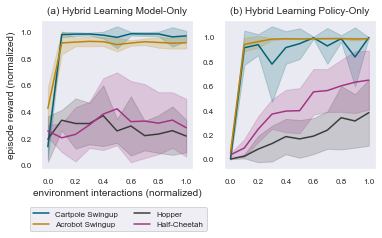

In [190]:
envs = ['InvertedPendulumRoboschoolEnv','AcrobotEnv','HopperEnv','HalfCheetahEnv']
plot_titles = ['Cartpole Swingup','Acrobot Swingup', 'Hopper', 'Half-Cheetah']

det = False
# for det in [True, False]:
fig, axs = plt.subplots(1, 2, figsize=(6,2.75))
colors = iter(reversed(sns.color_palette("dark")))
x_samps = np.linspace(0,1,11)
ax = axs[0]
for i, env in enumerate(envs):
    model_data_path = '../data/mpc_{}/{}/'.format('deter' if det else 'stoch',env)
    model_based_data = process_data(model_data_path)

    path_dir = '../data/hlt_deter/' if det else '../data/hlt_stoch/'         
    model_data = pickle.load(open(path_dir+env+'/model_test/reward_data.pkl', 'rb'))
    model_data_set = get_log_normalized(model_data,model_based_data)
    
    plot_data(ax,model_data_set,color=next(colors),label=plot_titles[i])
    ax.tick_params(axis='both', which='major', labelsize=8)
ax.set_title('(a) Hybrid Learning Model-Only', fontsize=10)
ax.set_ylabel('episode reward (normalized)',fontsize=10)
ax.set_xlabel('environment interactions (normalized)',fontsize=10)
# ax.legend(bbox_to_anchor=(0.,-0.2), loc="upper left", ncol=4, fontsize=8)
ax.legend(bbox_to_anchor=(-0.1,-0.44), loc="lower left", ncol=2, fontsize=8)

colors = iter(reversed(sns.color_palette("dark")))
ax = axs[1]
x_samps = np.linspace(0,1,11)
for i, env in enumerate(envs):
    policy_data_path = '../data/sac__/' + env +'/'
    model_free_data = process_data(policy_data_path)

    path_dir = '../data/hlt_deter/' if det else '../data/hlt_stoch/'         
    policy_data = pickle.load(open(path_dir+env+'/policy_test/reward_data.pkl', 'rb'))
    policy_data_set = get_log_normalized(policy_data,model_free_data)

    plot_data(ax,policy_data_set,color=next(colors),label=plot_titles[i])
    ax.tick_params(axis='both', which='major', labelsize=8)
ax.set_title('(b) Hybrid Learning Policy-Only', fontsize=10)
# ax.set_ylabel('episode reward (normalized)',fontsize=10)
# ax.set_xlabel('environment interactions (normalized)',fontsize=10)
# ax.legend(bbox_to_anchor=(0.,-0.4), loc="lower left", ncol=2, fontsize=8)

plt.savefig('component_analysis_stoch.pdf', bbox_inches='tight')

# single plot

In [114]:
env = 'InvertedPendulumRoboschoolEnv'

model_data_path = '../data/mpc_stoch/' + env +'/'
model_based_data = process_data(model_data_path)

policy_data_path = '../data/sac__/' + env +'/'
model_free_data = process_data(policy_data_path)

model_data = pickle.load(open('../data/hlt_stoch/'+env+'/model_test/reward_data.pkl', 'rb'))
model_data_set = get_log(model_data,model_based_data)

policy_data = pickle.load(open('../data/hlt_stoch/'+env+'/policy_test/reward_data.pkl', 'rb'))
policy_data_set = get_log(policy_data,model_free_data)

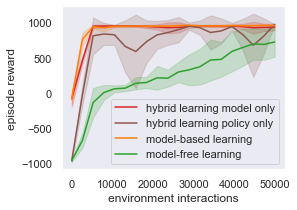

In [115]:
fig, ax = plt.subplots(1, 1, figsize=(4,3))

plot_data(ax,model_data_set,color='tab:red',label='hybrid learning model only')
plot_data(ax,policy_data_set,color='tab:brown',label='hybrid learning policy only')          
plot_data(ax,model_based_data,color='tab:orange',label='model-based learning')
plot_data(ax,model_free_data,color='tab:green',label='model-free learning')

plt.ylabel('episode reward')
plt.xlabel('environment interactions')
plt.legend()

# plt.savefig('component_analysis.pdf', bbox_inches='tight')